In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
listings_df = pd.read_csv("../input/seattle/listings.csv")
listings_df[:5]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
calender_df = pd.read_csv("/kaggle/input/seattle/calendar.csv")
calender_df[:5]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
reviews_df = pd.read_csv("/kaggle/input/seattle/reviews.csv")
reviews_df[:5]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
def disp_freq(df, col):
    """ Display a bar plot with counts
    
    Arguments:
        df(dataframe): an arbitrary dataframe
        col(str): one column of the dataframe
    
    """
    return df[col].value_counts().plot(kind='bar', title = col +' counts');

In [6]:
listings_df.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [7]:
list(listing_df.columns.values)

NameError: name 'listing_df' is not defined

In [8]:
listings_df.select_dtypes(include = ["float"])[:10]

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,3.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,6.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,2.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15
3,1.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0.89
5,1.0,1.0,47.630525,-122.366174,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.45
6,1.0,1.0,47.636605,-122.368519,1.0,1.0,1.0,NaN,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.46
7,5.0,5.0,47.640161,-122.375856,1.0,1.0,1.0,NaN,97.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.73
8,1.0,1.0,47.632410,-122.357216,1.0,1.0,1.0,NaN,97.0,10.0,9.0,10.0,9.0,10.0,10.0,NaN,1.22
9,6.0,6.0,47.637492,-122.366889,1.0,1.0,1.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,1.55


In [9]:
# Integer data type columns
listings_df.select_dtypes(include = ["int"])[:5]

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,241032,20160104002432,956883,4,2,1,365,14,41,71,346,207,2
1,953595,20160104002432,5177328,4,1,2,90,13,13,16,291,43,6
2,3308979,20160104002432,16708587,11,10,4,30,1,6,17,220,20,2
3,7421966,20160104002432,9851441,3,1,1,1125,0,0,0,143,0,1
4,278830,20160104002432,1452570,6,6,1,1125,30,60,90,365,38,1


In [10]:
# Object data type columns
listings_df.select_dtypes(include = ["object"])[:5]

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


In [11]:
list(listings_df.select_dtypes(include = ["object"]).columns.values)

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'require

In [12]:
listings_df.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [13]:
listings_df.isna().sum()[listings_df.isna().sum() > 0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

In [14]:
price_cols = [col for col in listings_df.columns if 'price' in col]
price_cols

['price', 'weekly_price', 'monthly_price']

In [15]:
listings_df[price_cols][:5]

,price,weekly_price,monthly_price
0,$85.00,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00"
2,$975.00,NaN,NaN
3,$100.00,$650.00,"$2,300.00"
4,$450.00,NaN,NaN


In [16]:
listings_df[['city','state','zipcode','market','smart_location','country_code','country']].describe()

,city,state,zipcode,market,smart_location,country_code,country
count,3818,3818,3811,3818,3818,3818,3818
unique,7,2,28,1,7,1,1
top,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States
freq,3810,3817,420,3818,3810,3818,3818


In [17]:
listings_df[['city','state','zipcode','smart_location']].groupby('state').count()

,city,zipcode,smart_location
state,,,
WA,3817,3810,3817
wa,1,1,1


In [18]:
listings_df[['city','zipcode','smart_location']].groupby('smart_location').count()

,city,zipcode
smart_location,,
"Ballard, Seattle, WA",1,1
"Phinney Ridge Seattle, WA",1,1
"Seattle , WA",2,2
"Seattle, WA",3810,3803
"West Seattle, WA",2,2
"seattle, wa",1,1
"西雅图, WA",1,1


In [19]:
# See location variations grouped by 'city'
listings_df[['city','zipcode']].groupby('city').count()

,zipcode
city,
"Ballard, Seattle",1
Phinney Ridge Seattle,1
Seattle,3803
Seattle,2
West Seattle,2
seattle,1
西雅图,1


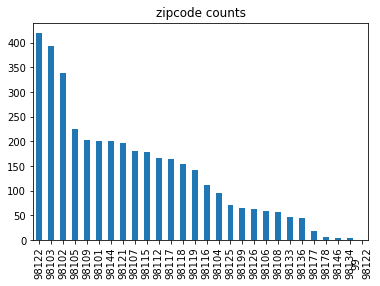

In [20]:
# Zipcode counts
disp_freq(listings_df, 'zipcode');

In [21]:
# Zipcode null counts
listings_df['zipcode'].isna().sum()

7

In [22]:
# Review related columns
review_cols = [col for col in listings_df.columns if 'review' in col]
listings_review_df = listings_df[review_cols]
listings_review_df

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89
...,...,...,...,...,...,...,...,...,...,...,...
3813,1,2015-09-27,2015-09-27,80.0,8.0,10.0,4.0,8.0,10.0,8.0,0.30
3814,2,2015-12-18,2015-12-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.00
3815,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# number_of_reviews
listings_review_df['number_of_reviews'].value_counts()

0      627
1      310
2      224
4      160
3      157
      ... 
404      1
320      1
294      1
278      1
353      1
Name: number_of_reviews, Length: 195, dtype: int64

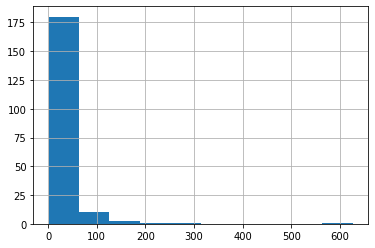

In [24]:
# Plot
listings_review_df['number_of_reviews'].value_counts().hist();

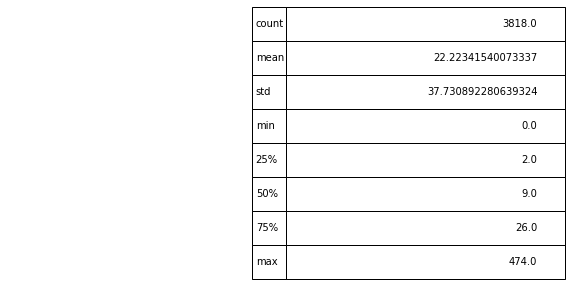

In [25]:
listings_review_description = listings_review_df['number_of_reviews'].describe().to_frame()
# Use for the blog post
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
ax.table(cellText = listings_review_description.values, rowLabels = listings_review_description.index, loc='center', bbox=[1,0,1,1]);

In [26]:
# Review euals 10 or less
np.sum(listings_review_df['number_of_reviews'] < 11)

2049

In [27]:
# Review euals 5 or less
np.sum(listings_review_df['number_of_reviews'] < 6)

1599

In [28]:
# Review euals 5 or less
np.sum(listings_review_df['number_of_reviews'] < 4)

1318

In [29]:
listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$700.00,$125.00
...,...,...,...,...,...
3813,$359.00,NaN,NaN,NaN,$230.00
3814,$79.00,NaN,NaN,$500.00,$50.00
3815,$93.00,$450.00,NaN,$250.00,$35.00
3816,$99.00,NaN,NaN,$300.00,$45.00


In [30]:
listings_price_df = listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

for col in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    listings_price_df = pd.concat([listings_price_df.drop(columns = [col]), listings_price_df[col].str.replace('$','').str.replace(',','').astype(float)], axis = 1)
    
listings_price_df[:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,NaN,NaN,NaN,NaN
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,NaN,NaN,1000.0,300.0
3,100.0,650.0,2300.0,NaN,NaN
4,450.0,NaN,NaN,700.0,125.0


In [31]:
# NA counts
listings_price_df.isna().sum()/listings_price_df.shape[0]

price               0.000000
weekly_price        0.473808
monthly_price       0.602672
security_deposit    0.511262
cleaning_fee        0.269775
dtype: float64

In [32]:
listings_price_df['calc_weekly_price'] = listings_price_df['price'] * 7
listings_price_df['calc_monthly_price'] = listings_price_df['price'] * 30
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,NaN,NaN,NaN,NaN,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,NaN,NaN,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,NaN,NaN,700.0,3000.0
4,450.0,NaN,NaN,700.0,125.0,3150.0,13500.0


In [33]:
# Fill missing values as 0
listings_price_df.fillna(0, inplace = True)
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,0.0,0.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,0.0,0.0,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,0.0,0.0,700.0,3000.0
4,450.0,0.0,0.0,700.0,125.0,3150.0,13500.0


In [34]:
for idx, row in listings_price_df.iterrows():
    if row['weekly_price'] == 0:
        listings_price_df.loc[idx, ['weekly_price']] = row['calc_weekly_price']
    if row['monthly_price'] == 0:
        listings_price_df.loc[idx, ['monthly_price']] = row['calc_monthly_price']

listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,595.0,2550.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,6825.0,29250.0,1000.0,300.0,6825.0,29250.0
3,100.0,650.0,2300.0,0.0,0.0,700.0,3000.0
4,450.0,3150.0,13500.0,700.0,125.0,3150.0,13500.0


In [35]:
listings_price_df = listings_price_df.drop(columns = ['calc_weekly_price', 'calc_monthly_price'])
listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,595.0,2550.0,0.0,0.0
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,6825.0,29250.0,1000.0,300.0
3,100.0,650.0,2300.0,0.0,0.0
4,450.0,3150.0,13500.0,700.0,125.0


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'security_deposit'}>,
        <AxesSubplot:title={'center':'cleaning_fee'}>]], dtype=object)

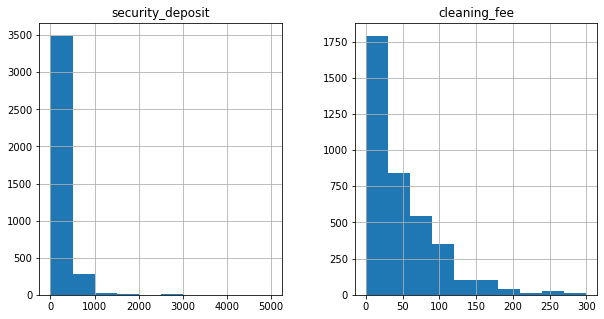

In [36]:
listings_price_df[['security_deposit', 'cleaning_fee']].hist(figsize = (10, 5))

In [37]:
listings_price_df['security_deposit'].describe()

count    3818.000000
mean      140.566003
std       237.387534
min         0.000000
25%         0.000000
50%         0.000000
75%       200.000000
max      5000.000000
Name: security_deposit, dtype: float64

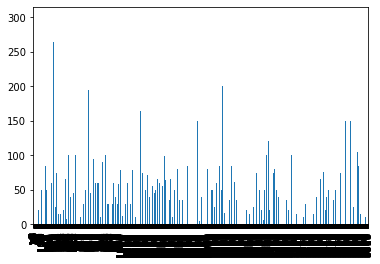

In [38]:
listings_price_df['cleaning_fee'].plot(kind='bar');

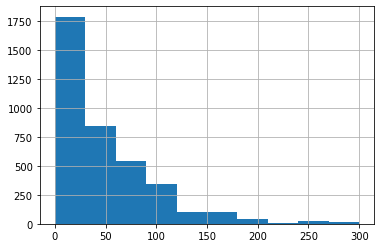

In [39]:
listings_price_df['cleaning_fee'].hist();

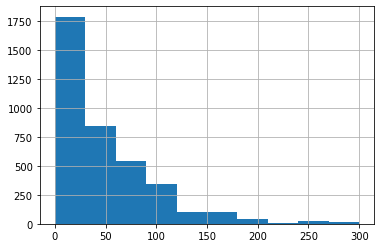

In [40]:
listings_price_df['cleaning_fee'].hist();

In [41]:
listings_price_df['cleaning_fee'].describe()

count    3818.000000
mean       45.062860
std        49.913798
min         0.000000
25%         0.000000
50%        30.000000
75%        65.000000
max       300.000000
Name: cleaning_fee, dtype: float64

In [42]:
listings_price_df['cleaning_fee'].describe()

count    3818.000000
mean       45.062860
std        49.913798
min         0.000000
25%         0.000000
50%        30.000000
75%        65.000000
max       300.000000
Name: cleaning_fee, dtype: float64

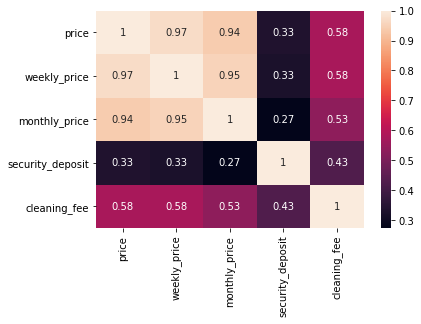

In [43]:
sns.heatmap(listings_price_df.corr(), annot = True);

In [44]:
review_scores_cols = [col for col in listings_df.columns if 'review_scores' in col]
review_scores_df = listings_df[review_scores_cols]

In [45]:
review_scores_df.isna().sum()

review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
dtype: int64

In [46]:
review_scores_df = review_scores_df.dropna()
review_scores_df.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,94.538949,9.636795,9.556048,9.786574,9.810956,9.608930,9.452185
std,6.597547,0.697614,0.797442,0.595663,0.559464,0.628746,0.750099
min,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


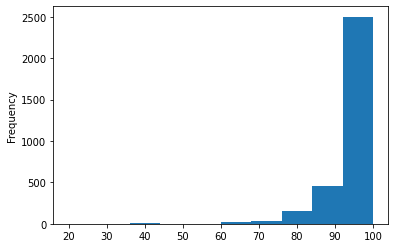

In [47]:
review_scores_df['review_scores_rating'].plot(kind='hist');

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


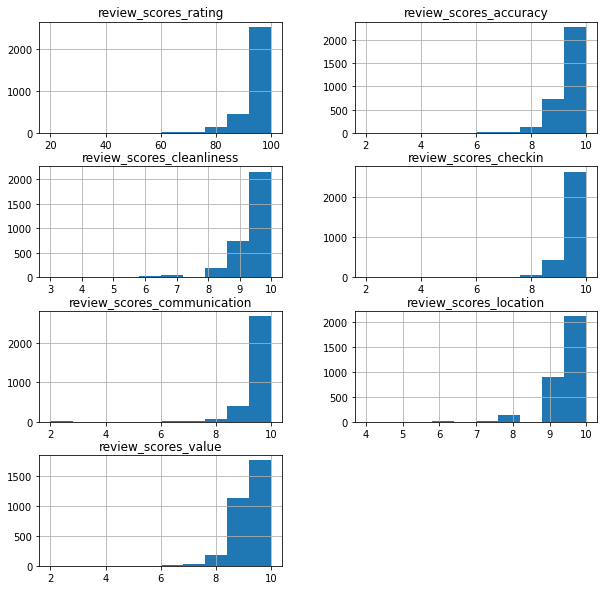

In [48]:
# Other scores
review_scores_df.hist(layout = [4,2], figsize = (10, 10), bins = 10);

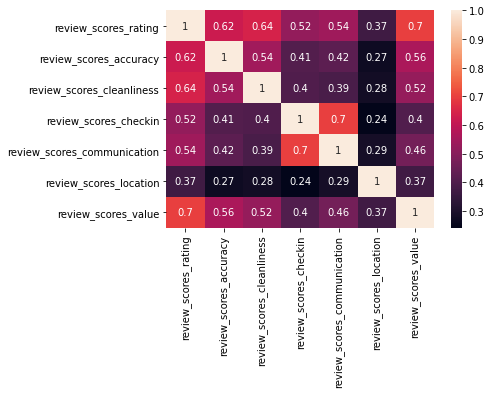

In [49]:
sns.heatmap(review_scores_df.corr(method ='pearson'), annot = True);

In [50]:
facilities_df = listings_df[['bathrooms', 'bedrooms', 'beds', 'accommodates']]
facilities_df[:5]

,bathrooms,bedrooms,beds,accommodates
0,1.0,1.0,1.0,4
1,1.0,1.0,1.0,4
2,4.5,5.0,7.0,11
3,1.0,0.0,2.0,3
4,2.0,3.0,3.0,6


In [51]:
facilities_df.isna().sum()

bathrooms       16
bedrooms         6
beds             1
accommodates     0
dtype: int64

In [52]:
facilities_df[facilities_df.isna().any(axis=1)]

,bathrooms,bedrooms,beds,accommodates
1242,NaN,1.0,2.0,4
1314,NaN,1.0,2.0,4
1357,NaN,2.0,3.0,6
1378,NaN,1.0,1.0,4
1429,1.0,NaN,1.0,2
1492,1.0,NaN,1.0,6
1493,1.0,NaN,2.0,4
1853,1.0,NaN,1.0,2
1961,NaN,1.0,NaN,4
1975,NaN,1.0,1.0,1


In [53]:
listings_df['accommodates'].value_counts().sort_index()

1      256
2     1627
3      398
4      785
5      184
6      332
7       52
8      119
9       13
10      25
11       3
12      15
14       3
15       2
16       4
Name: accommodates, dtype: int64

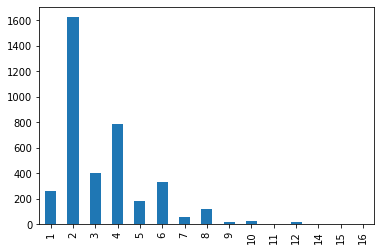

In [54]:
listings_df['accommodates'].value_counts().sort_index().plot(kind='bar');

In [55]:
listings_df[['property_type','room_type','bed_type','amenities']][:5]

,property_type,room_type,bed_type,amenities
0,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,Apartment,Entire home/apt,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [56]:
listings_df[['property_type','room_type','bed_type','amenities']].isna().sum()

property_type    1
room_type        0
bed_type         0
amenities        0
dtype: int64

In [57]:
(listings_df[['property_type','room_type','bed_type','amenities']])[listings_df[['property_type','room_type','bed_type','amenities']].isna().any(axis=1)]

,property_type,room_type,bed_type,amenities
2184,NaN,Entire home/apt,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ..."


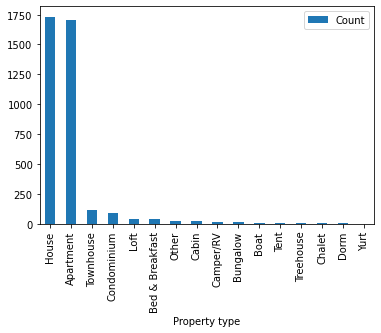

In [58]:
property_type_df = listings_df['property_type'].value_counts().reset_index()
property_type_df.columns = ['Property type','Count']
property_type_df.plot(x = 'Property type', y = 'Count', kind = 'bar');

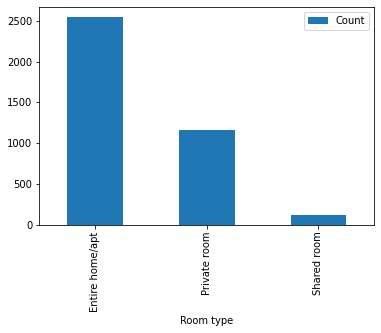

In [59]:
room_type_df = listings_df['room_type'].value_counts().reset_index()
room_type_df.columns = ['Room type','Count']
room_type_df.plot(x = 'Room type', y = 'Count', kind = 'bar');

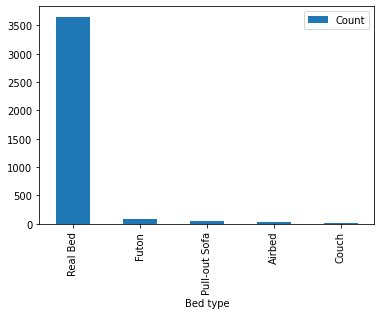

In [60]:
bed_type_df = listings_df['bed_type'].value_counts().reset_index()
bed_type_df.columns = ['Bed type','Count']
bed_type_df.plot(x = 'Bed type', y = 'Count', kind = 'bar');

In [61]:
amenities_df = listings_df['amenities']
amenities_df[:5]

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [62]:
amenities_df.value_counts()

{}                                                                                                                                                                                                                                                                                                                                   45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                               11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}                                 10
{TV,"Cable TV",I

In [63]:
amenities_df = amenities_df[amenities_df != '{}']
amenities_list = []

for index, row in amenities_df.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

amenities_list[:3]

[['TV',
  'Cable TV',
  'Internet',
  'Wireless Internet',
  'Air Conditioning',
  'Kitchen',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer'],
 ['TV',
  'Internet',
  'Wireless Internet',
  'Kitchen',
  'Free Parking on Premises',
  'Buzzer/Wireless Intercom',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer',
  'Smoke Detector',
  'Carbon Monoxide Detector',
  'First Aid Kit',
  'Safety Card',
  'Fire Extinguisher',
  'Essentials'],
 ['TV',
  'Cable TV',
  'Internet',
  'Wireless Internet',
  'Air Conditioning',
  'Kitchen',
  'Free Parking on Premises',
  'Pets Allowed',
  'Pets live on this property',
  'Dog(s)',
  'Cat(s)',
  'Hot Tub',
  'Indoor Fireplace',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer',
  'Smoke Detector',
  'Carbon Monoxide Detector',
  'Essentials',
  'Shampoo']]

In [64]:
new_amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()
new_amenities_df

,amenities
0,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
1,"[TV, Internet, Wireless Internet, Kitchen, Fre..."
2,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
3,"[Internet, Wireless Internet, Kitchen, Indoor ..."
4,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
...,...
3768,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
3769,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
3770,"[Cable TV, Wireless Internet, Kitchen, Free Pa..."
3771,"[TV, Wireless Internet, Kitchen, Free Parking ..."


In [65]:
dummies_amenities_df = new_amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(new_amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

dummies_amenities_df

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,1
3769,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
3770,0,0,1,0,1,0,1,1,0,1,...,1,0,1,0,0,0,1,0,0,1
3771,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [66]:
dummies_amenities_df.columns.values

array(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet',
       'Iron', 'Kitchen', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Other pet(s)', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet'], dtype=object)

In [67]:
dummies_amenities_df.sum()

24-Hour Check-in               616
Air Conditioning               677
Breakfast                      291
Buzzer/Wireless Intercom       538
Cable TV                      1446
Carbon Monoxide Detector      2485
Cat(s)                         382
Dog(s)                         509
Doorman                         85
Dryer                         2997
Elevator in Building           785
Essentials                    3237
Family/Kid Friendly           1963
Fire Extinguisher             2196
First Aid Kit                 1680
Free Parking on Premises      2167
Gym                            442
Hair Dryer                     774
Hangers                        846
Heating                       3627
Hot Tub                        303
Indoor Fireplace               886
Internet                      2811
Iron                           742
Kitchen                       3423
Laptop Friendly Workspace      745
Lock on Bedroom Door           100
Other pet(s)                    51
Pets Allowed        

In [68]:
# Wich row where Washer / Dryer is one
dummies_amenities_df[dummies_amenities_df['Washer / Dryer'] == 1]

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
2347,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,1
2971,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1


In [69]:
dummies_amenities_df = dummies_amenities_df.drop(columns = ['Washer / Dryer'])

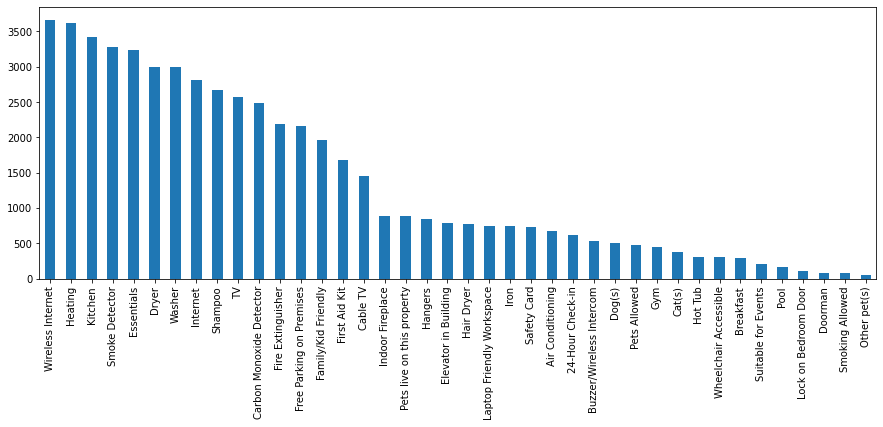

In [70]:
dummies_amenities_df.sum().sort_values(ascending = False).plot(kind='bar', figsize = (15,5));

In [71]:
policies_df = listings_df[['cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']]

policies_df[:5]

,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,moderate,f,f
1,strict,t,t
2,strict,f,f
3,flexible,f,f
4,strict,f,f


In [72]:
policies_df['cancellation_policy'].value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [73]:
policies_df['require_guest_profile_picture'].value_counts()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [74]:
policies_df['require_guest_phone_verification'].value_counts()

f    3443
t     375
Name: require_guest_phone_verification, dtype: int64

In [75]:
pd.get_dummies(policies_df['cancellation_policy'], prefix='cancellation_policy')[:5]

,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


In [76]:
calender_df[:5]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [77]:
calender_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [78]:
calender_df.isna().sum()/calender_df.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [79]:
calender_df['available'].value_counts()/calender_df.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

In [80]:
calender_df['listing_id'].value_counts()

9484823     365
5433597     365
7984550     365
8441477     365
9048029     365
           ... 
479653      365
10310373    365
4672934     365
1259305     365
6752031     365
Name: listing_id, Length: 3818, dtype: int64

In [81]:

selected_listings_cols = [
    'id',
 'zipcode',

 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
#  'square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',

 'cancellation_policy',
]
new_listings_df = listings_df[selected_listings_cols]
new_listings_df[:5]

,id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,...,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,241032,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,NaN,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
1,953595,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",...,$40.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
2,3308979,98119,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",...,$300.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
3,7421966,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible
4,278830,98119,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",...,$125.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict


In [82]:
review_scores_cols = [col for col in listings_df.columns if 'review_scores' in col]
drop_cols = ['number_of_reviews','bathrooms','property_type'] + review_scores_cols

new_listings_df.dropna(subset = drop_cols, axis = 0, inplace = True)

# Drop rows where the number of reviews is 0.
new_listings_df = new_listings_df[new_listings_df['number_of_reviews'] != 0]

# Drop rows where the amenities are empty
new_listings_df = new_listings_df[new_listings_df['amenities'] != '{}']

# Reset index
new_listings_df = new_listings_df.reset_index(drop = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [83]:
new_listings_df[['bedrooms', 'beds']] = new_listings_df[['bedrooms', 'beds']].fillna(value = 1)
# Change the data type of the price and related columns and fill missing values as 0
new_listings_price_df = new_listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

for col in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    new_listings_price_df = pd.concat([new_listings_price_df.drop(columns = [col]), new_listings_price_df[col].str.replace('$','').str.replace(',','').astype(float)], axis = 1)
    
new_listings_price_df.fillna(value = 0, inplace =True)
# Calculate weekly and monthly price
new_listings_price_df['calc_weekly_price'] = new_listings_price_df['price'] * 7
new_listings_price_df['calc_monthly_price'] = new_listings_price_df['price'] * 30
new_listings_price_df[:5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,0.0,0.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,0.0,0.0,1000.0,300.0,6825.0,29250.0
3,450.0,0.0,0.0,700.0,125.0,3150.0,13500.0
4,120.0,800.0,0.0,0.0,40.0,840.0,3600.0


In [84]:
for idx, row in new_listings_price_df.iterrows():
    if row['weekly_price'] == 0:
        new_listings_price_df.loc[idx, ['weekly_price']] = row['calc_weekly_price']
    if row['monthly_price'] == 0:
        new_listings_price_df.loc[idx, ['monthly_price']] = row['calc_monthly_price']

new_listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,595.0,2550.0,0.0,0.0,595.0,2550.0
1,150.0,1000.0,3000.0,100.0,40.0,1050.0,4500.0
2,975.0,6825.0,29250.0,1000.0,300.0,6825.0,29250.0
3,450.0,3150.0,13500.0,700.0,125.0,3150.0,13500.0
4,120.0,800.0,3600.0,0.0,40.0,840.0,3600.0


In [85]:
new_listings_price_df.drop(columns = ['calc_weekly_price', 'calc_monthly_price'], inplace = True)

In [86]:
cancellation_policy_dummy_df = pd.get_dummies(new_listings_df['cancellation_policy'], prefix = 'cancellation_policy')
room_type_dummy_df = pd.get_dummies(new_listings_df['room_type'], prefix = 'room_type')
property_type_dummy_df = pd.get_dummies(new_listings_df['property_type'], prefix = 'property_type')
bed_type_dummy_df = pd.get_dummies(new_listings_df['bed_type'], prefix = 'bed_type')
bed_type_dummy_df

,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
3118,0,0,0,0,1
3119,0,0,0,0,1
3120,0,0,0,0,1
3121,0,0,0,0,1


In [87]:

amenities_series = new_listings_df['amenities']
amenities_series = amenities_series[amenities_series != '{}']

# Iterate over rows and format them as list
amenities_list = []

for index, row in amenities_series.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

# Convert the list to a data frame
amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()

# Create a dummy data frame
dummies_amenities_df = amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

# Reset index
# dummies_amenities_df = dummies_amenities_df.reset_index(drop=True)
dummies_amenities_df[:5]

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [88]:
dummy_df = pd.concat([cancellation_policy_dummy_df, room_type_dummy_df, property_type_dummy_df, bed_type_dummy_df, dummies_amenities_df], axis = 1)
dummy_df[:5]

,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,1,1,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [89]:
new_listings_df.select_dtypes(include = ['int', 'float'])

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,4,1.0,1.0,1.0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,4,1.0,1.0,1.0,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,11,4.5,5.0,7.0,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,278830,6,2.0,3.0,3.0,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0
4,5956968,2,1.0,1.0,1.0,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,262764,5,1.0,2.0,3.0,5,92.0,9.0,8.0,10.0,10.0,10.0,8.0
3119,8578490,3,1.0,1.0,1.0,2,100.0,9.0,8.0,10.0,10.0,10.0,10.0
3120,3383329,4,1.0,1.0,2.0,73,96.0,10.0,10.0,10.0,10.0,9.0,10.0
3121,8101950,6,2.0,3.0,3.0,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0


In [90]:
concat_listings_df = pd.concat([new_listings_df.select_dtypes(include = ['int', 'float']), new_listings_price_df, dummy_df], axis = 1)
concat_listings_df[:5]

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,241032,4,1.0,1.0,1.0,207,95.0,10.0,10.0,10.0,...,0,0,0,0,0,1,1,0,0,1
1,953595,4,1.0,1.0,1.0,43,96.0,10.0,10.0,10.0,...,1,0,1,0,0,1,1,0,0,1
2,3308979,11,4.5,5.0,7.0,20,97.0,10.0,10.0,10.0,...,0,1,1,0,0,1,1,0,0,1
3,278830,6,2.0,3.0,3.0,38,92.0,9.0,9.0,10.0,...,0,1,1,0,0,1,0,0,0,1
4,5956968,2,1.0,1.0,1.0,17,95.0,10.0,10.0,10.0,...,0,1,1,0,0,0,0,0,0,1


In [91]:
concat_listings_df.isna().sum().sum()

0

In [92]:
new_calender_df = calender_df.copy()
new_calender_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [93]:
new_calender_df['date'] = pd.to_datetime(new_calender_df['date']) 
new_calender_df['price'] = new_calender_df['price'].str.replace('$','').str.replace(',','').astype(float)
new_calender_df['available'] = new_calender_df['available'].replace({'t': True, 'f': False})
new_calender_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,False,NaN
1393566,10208623,2016-12-30,False,NaN
1393567,10208623,2016-12-31,False,NaN
1393568,10208623,2017-01-01,False,NaN


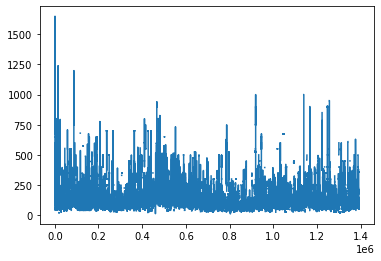

In [94]:
new_calender_df['price'].plot();

In [95]:
new_calender_df.groupby('listing_id')['available'].sum()

listing_id
3335        309
4291        365
5682        309
6606        365
7369         53
           ... 
10332096    365
10334184    361
10339144      0
10339145    365
10340165    358
Name: available, Length: 3818, dtype: int64

In [96]:
new_calender_df.groupby('listing_id')['available'].sum().max()

365

In [97]:
np.sum(new_calender_df.groupby('listing_id')['available'].sum() == 0)

95

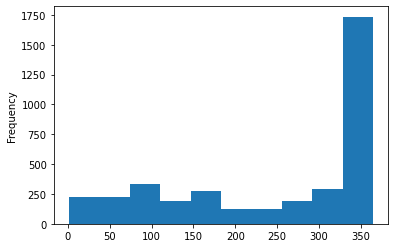

In [98]:
listing_id_available_count = new_calender_df.groupby('listing_id')['available'].sum().loc[lambda x : x != 0]
listing_id_available_count.plot(kind='hist');

In [99]:
listing_id_available_count[listing_id_available_count == 365].count()

678

In [100]:
always_f_listing_id = list(new_calender_df.groupby('listing_id')['available'].sum().loc[lambda x : x == 0].index.values)
# Drop these rows
clean_calender_df = new_calender_df[~new_calender_df['listing_id'].isin(always_f_listing_id)]
np.sum(clean_calender_df.groupby('listing_id')['available'].sum() == 0)

0

In [101]:
clean_calender_df['day'] = clean_calender_df['date'].dt.day
clean_calender_df['month'] = clean_calender_df['date'].dt.month
clean_calender_df['year'] = clean_calender_df['date'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [102]:
clean_calender_df[:5]

,listing_id,date,available,price,day,month,year
0,241032,2016-01-04,True,85.0,4,1,2016
1,241032,2016-01-05,True,85.0,5,1,2016
2,241032,2016-01-06,False,NaN,6,1,2016
3,241032,2016-01-07,False,NaN,7,1,2016
4,241032,2016-01-08,False,NaN,8,1,2016


In [103]:
clean_calender_df.isna().sum()

listing_id         0
date               0
available          0
price         424353
day                0
month              0
year               0
dtype: int64

In [104]:
list(concat_listings_df.columns.values)

['id',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type

In [105]:

selected_cols = [
#     'id',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
#  'number_of_reviews',
#  'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
#  'review_scores_value',
#  'price',
#  'weekly_price',
#  'monthly_price',
#  'security_deposit',
#  'cleaning_fee',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
#  'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'
                ]

# Exclude related columns and id
X = concat_listings_df[selected_cols]

y = concat_listings_df['price']
# Import required packages
from scipy.stats import uniform, randint
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# Train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=99) 
# Fit 
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [106]:
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train) 

# r2 score
train_score = r2_score(y_train, y_train_preds)
test_score =  r2_score(y_test, y_test_preds)
print(train_score, test_score)

0.5917059731220784 -2.872073873341953e+22


In [107]:
from xgboost import XGBRegressor
from xgboost import plot_importance
# Train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=99) 
# Create a model and fit the data to it 

xgb_model = XGBRegressor(
    max_depth=15,
    n_estimators=100,
    min_child_weight=10, 
    colsample_bytree=0.6, 
    subsample=0.6, 
    eta=0.2,    
    seed=0,
    learning_rate = 0.1,
    n_jobs=-1)

xgb_model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    verbose=10, 
    early_stopping_rounds = 10)

[0]	validation_0-rmse:143.24440	validation_1-rmse:140.92087
[10]	validation_0-rmse:73.75079	validation_1-rmse:73.64954
[20]	validation_0-rmse:55.25566	validation_1-rmse:58.41209
[30]	validation_0-rmse:49.10989	validation_1-rmse:55.47544
[40]	validation_0-rmse:46.09320	validation_1-rmse:54.69887
[50]	validation_0-rmse:43.70399	validation_1-rmse:54.83312


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.2, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [108]:
xgb_train_pred = xgb_model.predict(X_train)
xgb_val_pred = xgb_model.predict(X_val)
xgb_test_pred = xgb_model.predict(X_test)
for i in [[y_train, xgb_train_pred], [y_val, xgb_val_pred], [y_test, xgb_test_pred]]:
    print(r2_score(i[0], i[1]))

0.7463700706922698
0.5928163038201342
0.5403780605350057


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


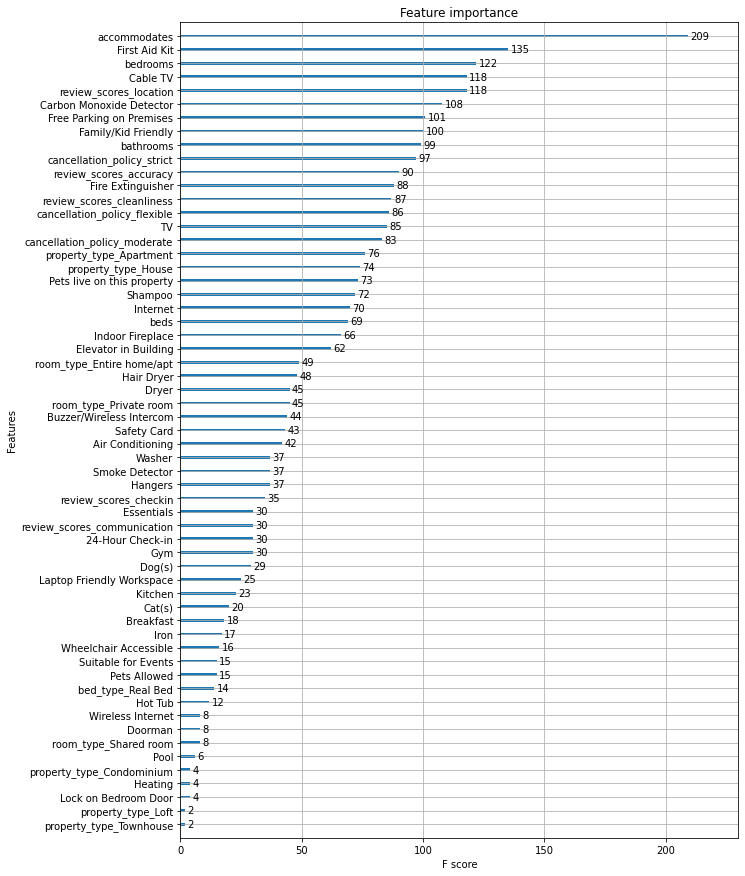

In [109]:
fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(xgb_model,ax=ax);

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, n_jobs=-1, random_state=0)

In [111]:
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)
for i in [[y_train, rf_train_pred], [y_val, rf_val_pred], [y_test, rf_test_pred]]:
    print(r2_score(i[0], i[1]))

0.8087142465249612
0.5685085229272628
0.5347090327126173


In [112]:
first_level = pd.DataFrame(xgb_val_pred, columns=["xgb"])
first_level["rf"] = rf_val_pred
first_level.info()

first_level_test = pd.DataFrame(xgb_test_pred, columns=["xgb"])
first_level_test["rf"] = rf_test_pred
first_level_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xgb     438 non-null    float32
 1   rf      438 non-null    float64
dtypes: float32(1), float64(1)
memory usage: 5.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xgb     937 non-null    float32
 1   rf      937 non-null    float64
dtypes: float32(1), float64(1)
memory usage: 11.1 KB


In [113]:
meta_model = LinearRegression(n_jobs=-1)
meta_model.fit(first_level, y_val)

LinearRegression(n_jobs=-1)

In [114]:
test_prediction = meta_model.predict(first_level_test)
r2_score(y_test, test_prediction)

0.5499273749023827

In [115]:
clean_calender_df[:5]

,listing_id,date,available,price,day,month,year
0,241032,2016-01-04,True,85.0,4,1,2016
1,241032,2016-01-05,True,85.0,5,1,2016
2,241032,2016-01-06,False,NaN,6,1,2016
3,241032,2016-01-07,False,NaN,7,1,2016
4,241032,2016-01-08,False,NaN,8,1,2016


In [116]:
count_calender_df = clean_calender_df.groupby(['listing_id', 'year', 'month']).sum()['available'].reset_index()
count_calender_df['listing_id'] = count_calender_df.listing_id.astype(str)
count_calender_df[:20]

,listing_id,year,month,available
0,3335,2016,1,0
1,3335,2016,2,1
2,3335,2016,3,31
3,3335,2016,4,30
4,3335,2016,5,31
5,3335,2016,6,30
6,3335,2016,7,31
7,3335,2016,8,31
8,3335,2016,9,30
9,3335,2016,10,31


In [117]:
max_month_availability = count_calender_df.groupby('month').max()['available']
max_month_availability

month
1     28
2     29
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: available, dtype: int64

In [118]:
count_calender_df['is_available'] = count_calender_df['available'] != 0

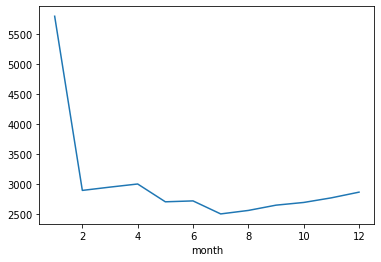

In [119]:
count_calender_df.groupby('month').sum()['is_available'].plot();

In [120]:
price_tendency_df = clean_calender_df[clean_calender_df['available'] == True]
#  Drop data of 2017
price_tendency_df = price_tendency_df[price_tendency_df['year'] != 2017]

# Drop the year column
price_tendency_df = price_tendency_df.drop(columns = ['year'])
# Group by month
month_tendency_df = price_tendency_df.groupby('month').agg({"price": ["mean", 'median', 'min', 'max', 'std']}).reset_index(level=0)
month_tendency_df

month       price                                 
                mean median   min     max         std
0      1  121.568409   99.0  12.0  1000.0   86.900024
1      2  124.293927  100.0  20.0  1000.0   91.550076
2      3  128.644488  100.0  20.0  1099.0   94.371410
3      4  135.097005  110.0  20.0  1099.0   98.232098
4      5  139.538183  110.0  20.0  1099.0  102.863280
5      6  147.473137  110.0  20.0  1099.0  112.481803
6      7  152.094150  115.0  20.0  1240.0  120.078098
7      8  150.656594  114.0  20.0  1250.0  118.754189
8      9  143.255949  110.0  20.0  1450.0  108.804290
9     10  137.031939  109.0  20.0  1650.0  104.491505
10    11  135.688738  106.0  10.0  1650.0  104.264654
11    12  137.251835  109.0  20.0  1650.0  105.101659

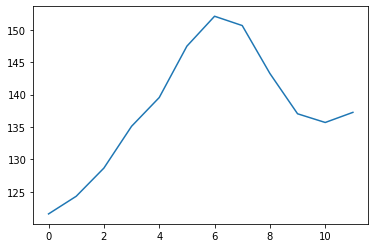

In [121]:
month_tendency_df['price']['mean'].plot();